# Part I: Dataset Download and Cleaning

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
import dataframe_image as dfi

## Dataset Download & Column Drop

In [2]:
###################################################################################################################
### DATA READING & CONCAT ###
#############################

# read and concat all JSON files
path_to_json = r'./data'
json_files = glob.glob(os.path.join(path_to_json, '*.json'))
df = pd.concat((pd.read_json(f) for f in json_files))

for col in df.columns:
    print(col, '\n')

# print before and after column drops
# dfi.export(df.head(10),"before-cleaning.png")
df = df.drop(columns=['REL_INSP_NR', 'CONST_OP', 'CONST_OP_CAUSE', 'FAT_CAUSE', 'INJURY_LINE_NR', 'LOAD_DT', 'RNUM'])
# dfi.export(df.head(10),"after-cleaning.png")

df.head(10)

SUMMARY_NR 

REL_INSP_NR 

AGE 

SEX 

NATURE_OF_INJ 

PART_OF_BODY 

SRC_OF_INJURY 

EVENT_TYPE 

EVN_FACTOR 

HUM_FACTOR 

OCC_CODE 

DEGREE_OF_INJ 

TASK_ASSIGNED 

HAZSUB 

CONST_OP 

CONST_OP_CAUSE 

FAT_CAUSE 

FALL_DISTANCE 

FALL_HT 

INJURY_LINE_NR 

LOAD_DT 

RNUM 



,SUMMARY_NR,AGE,SEX,NATURE_OF_INJ,PART_OF_BODY,SRC_OF_INJURY,EVENT_TYPE,EVN_FACTOR,HUM_FACTOR,OCC_CODE,DEGREE_OF_INJ,TASK_ASSIGNED,HAZSUB,FALL_DISTANCE,FALL_HT
0,120220,0,,12,4,30,1,6,1,0,1,2,,,
1,171769,0,,12,4,24,5,6,1,0,1,1,,,
2,173823,0,,5,19,23,2,7,1,0,2,1,9130,,
3,174086,0,,10,4,27,13,8,1,0,1,2,,,
4,174250,0,,7,9,34,1,5,2,0,3,1,,,
5,177279,0,,17,4,19,8,7,14,0,2,1,0560,,
6,99424,0,,12,13,26,1,5,12,0,1,1,,,
7,77081,0,,10,12,15,13,13,12,0,1,1,,,
8,77396,0,,21,4,38,8,18,12,0,3,1,2290,,
9,87213,0,,17,4,40,8,9,1,0,2,1,1480,,


In [3]:
# print age counts
AGE_df = pd.DataFrame({'Age Counts':df['AGE'].value_counts()})
# dfi.export(AGE_df.head(10), "Age_Counts.png")
# AGE_df.to_excel('age_output.xlsx')

# print sex counts
SEX_df = pd.DataFrame({'Sex Counts':df['SEX'].value_counts()})
# dfi.export(SEX_df, "Sex_Counts.png")
# SEX_df.to_excel('sex_output.xlsx')

FALL_HT_counts_df = pd.DataFrame({'Fall Height Counts':df['FALL_HT'].value_counts()})
FALL_DISTANCE_counts_df = pd.DataFrame({'Fall Distance Counts':df['FALL_DISTANCE'].value_counts()})

# print('Unique Fall Height Counts')
# print(FALL_HT_counts_df.shape)
# print('\n')
# print('Unique Fall Distance Counts')
# print(FALL_HT_counts_df.shape)

fall_causes_df_4 = df[df['EVENT_TYPE']==4]
fall_causes_df_5 = df[df['EVENT_TYPE']==5]

fall_causes_df_combined = pd.concat([fall_causes_df_4, fall_causes_df_5])
fall_causes_df_combined.shape

fall_ht_only = fall_causes_df_combined[fall_causes_df_combined['FALL_HT']!='']
fall_ht_only.shape

fatal_falls_only = fall_ht_only[fall_ht_only['DEGREE_OF_INJ']==1]
print(fatal_falls_only.shape)
fatal_falls_only.head(10)


(177, 15)


,SUMMARY_NR,AGE,SEX,NATURE_OF_INJ,PART_OF_BODY,SRC_OF_INJURY,EVENT_TYPE,EVN_FACTOR,HUM_FACTOR,OCC_CODE,DEGREE_OF_INJ,TASK_ASSIGNED,HAZSUB,FALL_DISTANCE,FALL_HT
145,200580041,37,M,21,19,42,4,13,4,999,1,2,,,10
67,202721494,54,M,12,9,42,4,17,14,999,1,1,,,1
117,202475398,62,M,21,13,43,4,18,14,853,1,1,,,4
27,200033074,50,M,7,15,43,4,18,14,999,1,1,,,3
25,202532230,61,M,6,13,42,5,13,7,0,1,1,,,25
28,201943206,32,M,6,13,43,5,13,10,573,1,1,,,20
64,200411064,52,M,6,13,5,5,6,1,999,1,1,,,5
92,200420081,26,M,21,13,29,5,13,18,575,1,1,,,2
97,200420115,41,M,21,4,5,5,13,1,999,1,1,,,11
0,200033702,50,M,12,19,42,5,13,10,595,1,2,,,35


# Part II: Data Manipulation

## Age Binning:
### Converting a Continuous Variable into a Categorical Variable

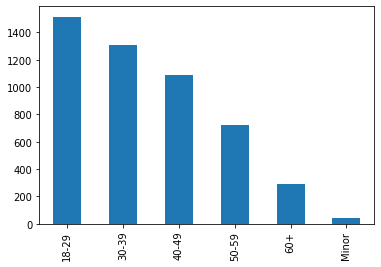

In [4]:
df['BINS'] = pd.cut(x=df['AGE'], bins=[1, 17, 30, 40, 50, 60, np.inf], labels=['Minor',
                                                                               '18-29',
                                                                               '30-39',
                                                                               '40-49',
                                                                               '50-59',
                                                                               '60+'])
 
# graph the frequency of each bin
df['BINS'].value_counts().plot.bar()

# export to Excel
# df['BINS'].value_counts().to_excel('age_bin_output.xlsx')


## Mapping IMIS Dictionaries:
### Converting Numerical Values to Text

In [14]:
# Housekeeping:
# copying the previous dataframe and filtering more columns
df2 = fall_causes_df_combined[['NATURE_OF_INJ', 'PART_OF_BODY', 'DEGREE_OF_INJ', 'EVENT_TYPE', 'TASK_ASSIGNED']]
df2=df2.copy()

# misc. note
#df2.set_index('SUMMARY_NR', inplace = True)

# example of numerical data
example_of_numerical_data_df = pd.DataFrame(df['NATURE_OF_INJ'])
example_of_numerical_data_df.head(10)

# export dataframe
# dfi.export(example_of_numerical_data_df.head(10), "example_numerical_data.png")

,NATURE_OF_INJ
0,12
1,12
2,5
3,10
4,7
5,17
6,12
7,10
8,21
9,17


### IMIS Dictionary: Nature of Injury

In [15]:
# Import IMIS dictionary
nature_of_inj_df = pd.read_csv('./IMIS_dictionary_files/nature_of_inj.csv', header=0)
nature_of_inj_df.set_index('code', inplace = True)
nature_of_inj_dict = nature_of_inj_df.to_dict()

# Map IMIS dictionary to column values (converting numbers to text)
df2['NATURE_OF_INJ'] = df2['NATURE_OF_INJ'].map(nature_of_inj_dict['Nature'])

# Convert unique cell values to unique columns
df2 = pd.get_dummies(df2, columns=['NATURE_OF_INJ'])

### IMIS Dictionary: Part of Body

In [16]:
# Import IMIS dictionary
part_of_body_df = pd.read_csv('./IMIS_dictionary_files/part_of_body.csv', header=0)
part_of_body_df.set_index('Code', inplace = True)
part_of_body_dict = part_of_body_df.to_dict()

# Map IMIS dictionary to column values (converting numbers to text)
df2['PART_OF_BODY'] = df2['PART_OF_BODY'].map(part_of_body_dict['POB'])

# Convert unique cell values to unique columns
df2 = pd.get_dummies(df2, columns=['PART_OF_BODY'])

### IMIS Dictionary: Event Type

In [17]:
# Import IMIS dictionary
event_df = pd.read_csv('./IMIS_dictionary_files/event.csv', header=0)
event_df.set_index('code', inplace = True)
event_dict = event_df.to_dict()

# Map IMIS dictionary to column values (converting numbers to text)
df2['EVENT_TYPE'] = df2['EVENT_TYPE'].map(event_dict['Event'])

# Convert unique cell values to unique columns
df2 = pd.get_dummies(df2, columns=['EVENT_TYPE'])

### IMIS Dictionary: Degree of Injury

In [18]:
# Import IMIS dictionary
degree_df = pd.read_csv('./IMIS_dictionary_files/degree.csv', header=0)
degree_df.set_index('code', inplace = True)
degree_dict = degree_df.to_dict()

# Map IMIS dictionary to column values (converting numbers to text)
df2['DEGREE_OF_INJ'] = df2['DEGREE_OF_INJ'].map(degree_dict['degree'])

# Convert unique cell values to unique columns
df2 = pd.get_dummies(df2, columns=['DEGREE_OF_INJ'])

### IMIS Dictionary: Task Assigned

In [19]:
# Import IMIS dictionary
task_df = pd.read_csv('./IMIS_dictionary_files/task.csv', header=0)
task_df.set_index('code', inplace = True)
task_dict = task_df.to_dict()

# Map IMIS dictionary to column values (converting numbers to text)
df2['TASK_ASSIGNED'] = df2['TASK_ASSIGNED'].map(task_dict['task'])

# Convert unique cell values to unique columns
df2 = pd.get_dummies(df2, columns=['TASK_ASSIGNED'])

# Building the Apriori Algorithm

In [22]:
###################################################################################################################
### Apriori ###
###############

### Strip chars that would cause an error ###
df2.columns = df2.columns.str.replace(" ", "_")
df2.columns = df2.columns.str.replace("/", "_")
df2.columns = df2.columns.str.replace('(', "_")
df2.columns = df2.columns.str.replace(')', "_")
df2.columns = df2.columns.str.replace("__", "_")
df2.columns = df2.columns.str.strip()
df2.columns


### APRIORI ALGORITHM ###
frq_items = apriori(df2, min_support = .01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = .001)
rules = rules.sort_values(['lift', 'confidence'], ascending =[False, True])

### DISPLAY SETTINGS ###
pd.set_option('display.max_colwidth', None)

task_rules_often = rules['antecedents'] = ((rules['antecedents'][rules['antecedents'].astype(str).str.contains('TASK_ASSIGNED_Often_assigned')]))
task_rules_rarely = rules['antecedents'] = ((rules['antecedents'][rules['antecedents'].astype(str).str.contains('TASK_ASSIGNED_Rarely_assigned')]))

rules['antecedents'] = task_rules_often

task_rules_df = rules.dropna().reset_index().drop(['index', 'conviction', 'leverage'], axis=1)

# current focus
# current_focus = task_rules_df[['antecedents', 'consequents', 'lift']]
current_focus = task_rules_df

# image export
# dfi.export(current_focus.tail(10), "tail_with_001_lift.png")

# row select
# task_rules_df.iloc[[47]]


current_focus.head(50)


# ant_support_list = current_focus.tail(10)['antecedent support']
# con_support_list = current_focus.tail(10)['consequent support']
# relationship_support_list = current_focus.tail(10)['support']

# new_df = pd.DataFrame([np.average(ant_support_list), np.average(con_support_list), np.average(relationship_support_list)], ['AVG Ant. Support', 'AVG Con. Support','AVG Relationship Support'])

# new_df



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"(EVENT_TYPE_Fall_From_Elevation_, TASK_ASSIGNED_Often_assigned, DEGREE_OF_INJ_Non-Hospitalized)",(NATURE_OF_INJ_Bruise_Contusion_Abrasion),0.054829,0.099598,0.021630,0.394495,3.960893
1,"(TASK_ASSIGNED_Often_assigned, NATURE_OF_INJ_Bruise_Contusion_Abrasion)","(EVENT_TYPE_Fall_From_Elevation_, DEGREE_OF_INJ_Non-Hospitalized)",0.091046,0.063380,0.021630,0.237569,3.748312
2,"(TASK_ASSIGNED_Often_assigned, DEGREE_OF_INJ_Non-Hospitalized)",(NATURE_OF_INJ_Bruise_Contusion_Abrasion),0.068410,0.099598,0.024648,0.360294,3.617499
3,"(TASK_ASSIGNED_Often_assigned, DEGREE_OF_INJ_Non-Hospitalized)","(EVENT_TYPE_Fall_From_Elevation_, NATURE_OF_INJ_Bruise_Contusion_Abrasion)",0.068410,0.090040,0.021630,0.316176,3.511502
4,"(TASK_ASSIGNED_Often_assigned, NATURE_OF_INJ_Bruise_Contusion_Abrasion)",(DEGREE_OF_INJ_Non-Hospitalized),0.091046,0.077968,0.024648,0.270718,3.472180
5,"(EVENT_TYPE_Fall_From_Elevation_, TASK_ASSIGNED_Often_assigned, NATURE_OF_INJ_Bruise_Contusion_Abrasion)",(DEGREE_OF_INJ_Non-Hospitalized),0.081992,0.077968,0.021630,0.263804,3.383495
6,"(TASK_ASSIGNED_Often_assigned, NATURE_OF_INJ_Fracture, DEGREE_OF_INJ_Fatal)",(PART_OF_BODY_Neck),0.126258,0.025151,0.010563,0.083665,3.326534
7,"(TASK_ASSIGNED_Often_assigned, PART_OF_BODY_Neck)","(NATURE_OF_INJ_Fracture, DEGREE_OF_INJ_Fatal)",0.023139,0.144869,0.010563,0.456522,3.151268
8,"(DEGREE_OF_INJ_Hospitalized, NATURE_OF_INJ_Fracture, TASK_ASSIGNED_Often_assigned)",(PART_OF_BODY_Wrists),0.285714,0.015091,0.013581,0.047535,3.150000
9,"(DEGREE_OF_INJ_Hospitalized, NATURE_OF_INJ_Fracture, TASK_ASSIGNED_Often_assigned)","(EVENT_TYPE_Fall_From_Elevation_, PART_OF_BODY_Wrists)",0.285714,0.013581,0.012072,0.042254,3.111111
